# An analysis of NBA players in the 2021/2022 season

This project will rely heavily in the use of API as data sources. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)
    - next_game_date (datetime)

Here is a sample of how the final result should look like:

In [1]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'GAME_DATE': {200765: pd.Timestamp('2022-04-10 00:00:00'), 203107: pd.Timestamp('2022-04-10 00:00:00'), 204060: pd.Timestamp('2022-04-10 00:00:00')},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2022-04-10,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,2022-04-10,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,2022-04-10,14000000,"34 years, 6 months, 8 days"


## Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Again you can decide to use any source, but we recommend using information provided [here](https://www.basketball-reference.com/contracts/players.html), as it lets you export the data as a csv.  

1- Lets create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now we only need the player id, name, and team. We save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Player with id 1630597 (This guy is a problem ;))

In [61]:
# Libreries and methods:

# Data manipulation:
import numpy       as np
import pandas      as pd
import scipy.stats as stats

# Characters transformation:
import unicodedata

# Time and datetype managment:
import time
from   datetime               import date
from   datetime               import datetime
from   dateutil.relativedelta import relativedelta

# File oppening:
import io

# Data visualization:
import seaborn           as sns
import matplotlib.pyplot as plt


import difflib

In [5]:
# NBA_API instalation:
!pip install nba_api

     -------------------------------------- 125.6/125.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 62.8/62.8 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 61.2/61.2 kB 3.2 MB/s eta 0:00:00
     -------------------------------------- 160.2/160.2 kB 4.8 MB/s eta 0:00:00
Using legacy 'setup.py install' for nba_api, since package 'wheel' is not installed.
  Running setup.py install for nba_api: started
  Running setup.py install for nba_api: finished with status 'done'


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


When we call sertain method of a library if we imported directly we don't need to write the library name when we use it:
    - import nba_api               ---> example = nba_api.stats.endpoints.CommonAllPlayers.getsomething()
    - from nba_api.stats.endpoints import CommonAllPlayers ---> example = CommonAllPlayers.getsomething()
    - from nba_api.stats.endpoints import CommonAllPlayers as cap     ---> example = cap().getsomething()


In [6]:
# NBA_api methods:

from nba_api.stats.endpoints import CommonAllPlayers  as cap  # exersice 1 
from nba_api.stats.endpoints import commonplayerinfo  as cpi  # exersice 2
from nba_api.stats.endpoints import PlayerProfileV2   as pp2  # exersice 3 and 4

Once I got the correct DFs I save them in my computer so when I run the code its no longer necesary to call the api. 

from_api = False ---> uses the files from the computer
from_api = True  ---> runs and call the api 

In [7]:
### Complete in this cell: get all active players from the api

def get_and_save_players_list(from_api):
  """
  Using the CommonALlPlayers end point and the method: get_data_frame we get the following features, if we specify the dataframe:
  ['PERSON_ID', 'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FIRST_LAST', 'ROSTERSTATUS', 'FROM_YEAR', 'TO_YEAR', 'PLAYERCODE', 'TEAM_ID', 
  'TEAM_CITY', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'TEAM_CODE', 'GAMES_PLAYED_FLAG', 'OTHERLEAGUE_EXPERIENCE_CH']

  Using: 	is_only_current_season = 1 we get the players that are active this season.

  """
  if from_api:
    
    nba_players = cap( is_only_current_season=1).get_data_frames()[0] 

    # Now we filter: we dont want tea_id=0, GAMES_PLAYED_FLAG == N and ["PERSON_ID"] == 1630597
    df_team_id0 = nba_players[nba_players["TEAM_ID"] == 0].index

    nba_players = nba_players.drop(df_team_id0)

    df_gpfN     = nba_players[nba_players["GAMES_PLAYED_FLAG"] == 'N'].index

    nba_players = nba_players.drop(df_gpfN)

    df_pid1630597 = nba_players[nba_players["PERSON_ID"] == 1630597].index
    df_pid1630492 = nba_players[nba_players["PERSON_ID"] == 1630492].index

    nba_players = nba_players.drop(df_pid1630597)
    nba_players = nba_players.drop(df_pid1630492)
  else:
    nba_players  = pd.read_csv(io.BytesIO(uploaded['nba_current_players_list.csv']))

  return nba_players


In [8]:
current_players_list = get_and_save_players_list(True)
current_players_list.to_csv("nba_current_players_list.csv")

In [10]:
print('We got ',current_players_list.shape[0], ' players and ', current_players_list.shape[1], 'features')

We got  493  players and  16 features


In [11]:
current_players_list.columns

Index(['PERSON_ID', 'DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FIRST_LAST',
       'ROSTERSTATUS', 'FROM_YEAR', 'TO_YEAR', 'PLAYERCODE', 'PLAYER_SLUG',
       'TEAM_ID', 'TEAM_CITY', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'TEAM_SLUG',
       'TEAM_CODE', 'GAMES_PLAYED_FLAG', 'OTHERLEAGUE_EXPERIENCE_CH'],
      dtype='object')

In [12]:
current_players_list.head(2)

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,PLAYER_SLUG,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_SLUG,TEAM_CODE,GAMES_PLAYED_FLAG,OTHERLEAGUE_EXPERIENCE_CH
0,1630173,"Achiuwa, Precious",Precious Achiuwa,1,2020,2022,precious_achiuwa,precious_achiuwa,1610612761,Toronto,Raptors,TOR,raptors,raptors,Y,00
1,203500,"Adams, Steven",Steven Adams,1,2013,2022,steven_adams,steven_adams,1610612763,Memphis,Grizzlies,MEM,grizzlies,grizzlies,Y,00


Now lets create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

In [19]:
def get_players_personal_information(current_players_list):
  """
  Using th PERSON_ID from the dataframe current_player_list we get one by one 
  the personal info of each player. So we need to set a retard time in order to avoid been block 
  from the API

  We are gonna use: CommonPlayerInfo, there are sevreal DFs available we want the [0] 

  INPUT:
          df with the active players

  OUTPUT:
          new df
  """
  
  list_id = current_players_list['PERSON_ID'].tolist()
  df_info = pd.DataFrame()
  
  for id in list_id:
 
      df_info = df_info.append(cpi.CommonPlayerInfo(id).get_data_frames()[0])
      time.sleep(0.5)

  
  
  df_info.set_index('PERSON_ID',inplace=True)

  df_info = df_info[["DISPLAY_FIRST_LAST", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"]]
  df_info = df_info.rename(columns={'DISPLAY_FIRST_LAST':'PLAYER_NAME'})
  
  return df_info
       

In [20]:
players_personal_info = get_players_personal_information(current_players_list)
players_personal_info.to_csv("nba_players_personal_info.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_11820\3377949429.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_info = df_info.append(cpi.CommonPlayerInfo(id).get_data_frames()[0])
C:\Users\User\AppData\Local\Temp\ipykernel_11820\3377949429.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_info = df_info.append(cpi.CommonPlayerInfo(id).get_data_frames()[0])
C:\Users\User\AppData\Local\Temp\ipykernel_11820\3377949429.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_info = df_info.append(cpi.CommonPlayerInfo(id).get_data_frames()[0])
C:\Users\User\AppData\Local\Temp\ipykernel_11820\3377949429.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [21]:
players_personal_info.shape

(493, 9)

In [22]:
players_personal_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 1630173 to 1627826
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PLAYER_NAME   493 non-null    object
 1   TEAM_NAME     493 non-null    object
 2   POSITION      493 non-null    object
 3   HEIGHT        493 non-null    object
 4   WEIGHT        493 non-null    object
 5   COUNTRY       493 non-null    object
 6   BIRTHDATE     493 non-null    object
 7   SEASON_EXP    493 non-null    int64 
 8   DRAFT_NUMBER  487 non-null    object
dtypes: int64(1), object(8)
memory usage: 38.5+ KB


In [23]:
players_personal_info.head(2)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER
PERSON_ID,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,2,20
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,9,12


Coding a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

Player career statistics:
*   games played (int)
*   minutes per game (float)
*   points per game (float)
*   rebounds per game (float)
*   assists per game (float)
*   steals per game (float)
*   blocks per game (float)

In [29]:
def get_players_career_stats(current_players_list):
  """
  using the PlayerCareerStats endpoint we alterate through current_players_list PERSON_ID
  and we call the api and get the information.
  
  We create a empty data frame and we complited row by row in every iteration. Thats why we need the time sleep method.
  """
  
  df_stats = pd.DataFrame()
  
  list_id = current_players_list['PERSON_ID'].tolist()
    
  for player_id in list_id:
    df_stats = df_stats.append(pp2(player_id, per_mode36='PerGame').career_totals_regular_season.get_data_frame())
    time.sleep(0.5)
    
  
  df_stats = df_stats.loc[:, ['PLAYER_ID','GP', 'MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK']]
  
    
  

  
  #df_stats.set_index('PERSON_ID',inplace=True)
  #df_stats = df_stats.drop(['PLAYER_ID'], axis=1)
  
  
  return df_stats


In [30]:
players_career_stats = get_players_career_stats(current_players_list)
players_career_stats.to_csv("nba_players_career_stats.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_11820\2696809094.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stats = df_stats.append(pp2(player_id, per_mode36='PerGame').career_totals_regular_season.get_data_frame())
C:\Users\User\AppData\Local\Temp\ipykernel_11820\2696809094.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stats = df_stats.append(pp2(player_id, per_mode36='PerGame').career_totals_regular_season.get_data_frame())
C:\Users\User\AppData\Local\Temp\ipykernel_11820\2696809094.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_stats = df_stats.append(pp2(player_id, per_mode36='PerGame').career_totals_regular_season.get_data_frame())
C:\Users\User\AppData\Local\Temp\ipykernel_11820\2696809094.p

In [31]:
players_career_stats.shape

(493, 8)

In [33]:
players_career_stats.rename(columns = {'PLAYER_ID':'PERSON_ID'}, inplace = True)

In [36]:
players_career_stats.set_index('PERSON_ID',inplace=True)

In [37]:
players_career_stats.head(2)

,GP,MIN,PTS,REB,AST,STL,BLK
PERSON_ID,,,,,,,
1630173,134,18.4,7.2,5.1,0.8,0.4,0.5
203500,664,26.8,9.3,8.0,1.5,0.9,0.9


In [38]:
players_career_stats.to_csv("nba_players_career_stats.csv")

The next function find players next games and save the information to a csv call "nba_players_next_game.csv"

In [47]:
def get_players_next_game(current_players_list, from_api):

  """
  this function retunr a df with person_id and the information about the next game.
  I need to different dataframes from the sema endpoint and concatenated them in order to get all the information
  Those players who wont play the next game (their team didnt make to the playoff) whoul show:
  player_id   gext_game
    1234        nan    
  
  in this case we will use PlayerProfileV2 endpoint and the folowing dfs:

  next_game
  career_totals_regular_season
  
  """
  if from_api:
    
    # craete a list to iterate:  
    list_id = current_players_list['PERSON_ID'].tolist()
    
    # new and empty dfs:
    df_next_id    = pd.DataFrame()
    df_next_info  = pd.DataFrame()
    df_next       = pd.DataFrame()
    df_next_final = pd.DataFrame()

    for player_id in list_id: 
      df_next_id    = pp2(player_id=player_id).career_totals_regular_season.get_data_frame()
      df_next_info  = pp2(player_id=player_id).next_game.get_data_frame()
      df_next       = pd.concat([df_next_id['PLAYER_ID'], df_next_info[['GAME_DATE']]], axis=1)
      df_next_final = pd.concat([df_next_final, df_next], axis=0)
      time.sleep(0.5)

      

  else:
    df_next_final  = pd.read_csv(io.BytesIO(uploaded['nba_players_next_game.csv']))

  # df acomodation:
  
  df_next_final.set_index(df_next_final.PLAYER_ID, inplace=True)
  df_next_final = df_next_final.rename(columns={'Player_id':'PERSON_ID'})
  df_next_final = df_next_final.drop(['PLAYER_ID'], axis=1)
  df_next_final = df_next_final.rename(columns={'Player_id':'PERSON_ID'})
  
  return df_next_final

In [48]:
players_next_game = get_players_next_game(current_players_list,True)
players_next_game.to_csv("nba_players_next_game.csv")

In [49]:
players_next_game.head(2)

,GAME_DATE
PLAYER_ID,
1630173,NaN
203500,NaN


In [50]:
players_next_game.shape

(493, 1)

In [51]:
players_next_game.to_csv("nba_players_next_game_.csv")

Now we create a function to find players salary for this season, save the information to a csv called "nba_players_salary.csv". 

In [52]:
# function to eliminate accents and ñ:

def eliminar_tildes(cadena):
    s = ''.join((c for c in unicodedata.normalize('NFD',cadena) if unicodedata.category(c) != 'Mn'))
    return s

In [77]:
!pip install lxml

In [76]:
pip install --upgrade pip

     ---------------------------------------- 2.0/2.0 MB 10.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [78]:
def get_nba_players_salaries(cpl,from_api):  
  """
  we download the salary_player information from the link:https://hoopshype.com/salaries/players/%27
  We need to be aware that the table format its a little bit uggly. 
  1) There is a line "title" wich we errase
  2) There is a Header reminder when you go downside on the table, we have to errase that line also 
  3) There are some names that have special characters that arent included at the english dictionary (the nba database is written in english)
  So I have to transform those names
  
  """

  if from_api:
    # I go to the webside and get the information:
    df_sal = pd.read_html("https://www.basketball-reference.com/contracts/players.html#player-contracts")[0]
    #df_sal = pd.read_html("https://hoopshype.com/salaries/players/%27")[0]

    # I filter just the columns I need:
    df_sal = df_sal[['Player', '2022/23']] 

    # I change the name:
    # the time have passed so the salaries 21/22 weren't available any more... so I used 22/23 
    df_sal = df_sal.rename(columns={'Player':'PLAYER_NAME', '2022/23':'SALARY'})

    # Names transformation:
    p_list = df_sal.PLAYER_NAME.to_list()

    for i in p_list:
      df_sal.PLAYER_NAME[i] = eliminar_tildes(i)

    # drop empty salary rows
    df_sal.dropna(subset = ['SALARY'], inplace=True)   

    # Drop duplicates
    df_sal.drop_duplicates(subset='PLAYER_NAME', inplace=True)


    # In order to get the same Names of the rest of the dfs I will do a merge with curremt_player_list:
    # I need to rename DISPLAY_FIRST_LAST--> PLAYER_LIST
    cpl = cpl.rename(columns={'DISPLAY_FIRST_LAST':'PLAYER_NAME'})
    cpl['PLAYER_NAME'] = cpl['PLAYER_NAME'].str.strip()
    df_sal['PLAYER_NAME'] = df_sal['PLAYER_NAME'].str.strip()

    # filtering and renaming the columns
    df_sal_f = pd.merge(cpl, df_sal, on='PLAYER_NAME', how='left')

  else:
    df_sal_f  = pd.read_csv(io.BytesIO(uploaded['nba_players_salary.csv']))    
  
  # set column Player_id as the dataframe index 
  
  df_sal_f = df_sal_f.set_index('PERSON_ID')
  df_sal_f = df_sal_f[['PLAYER_NAME', 'SALARY']]  
  df_sal_f = df_sal_f.drop(['PLAYER_NAME'], axis=1)
  
  return df_sal_f

In [ ]:
players_salaries = get_nba_players_salaries(current_players_list, True)
players_salaries.to_csv("nba_players_salary.csv")

In [81]:
players_salaries = pd.read_csv (r'C:/Ine/AnyoneAI/Sprint_1/nba_players_salary.csv')

In [82]:
players_salaries.head(2)

,PERSON_ID,PLAYER_NAME,SALARY
0,1630173,Precious Achiuwa,"$2,711,280"
1,203500,Steven Adams,"$17,073,171"


In [83]:
players_salaries.shape

(503, 3)

Now we merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "GAME_DATE", "SALARY"

The result is saved as a csv called "raw_nba_players_dataset.csv"

In [84]:
current_players_list.set_index('PERSON_ID',inplace=True)

In [85]:
def merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries):
  """
  we merge: 
           players_personal_info
  +
           players_career_stats
  +
           players_next_game
  +
           players_salaries
  """
  # merging players_peronsal_info and player_career_stats:
  df_ppi_pcs = pd.merge(players_personal_info, players_career_stats, on='PERSON_ID', how='left')
  
  # merging df_ppi_pcs and player_next_game:
  df_ppi_pcs_png = pd.merge(df_ppi_pcs,players_next_game, left_index = True, right_index = True, how='left')
  
  # merging df_ppi_pcs_png and player_salaries:
  df_ppi_pcs_png_ps = pd.merge(df_ppi_pcs_png, players_salaries, on='PERSON_ID', how='left')
  
  return df_ppi_pcs_png_ps

In [86]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries)
raw_players_dataset.to_csv("raw_nba_players_dataset.csv")

In [87]:
raw_players_dataset.head(3)

,PERSON_ID,PLAYER_NAME_x,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,PLAYER_NAME_y,SALARY
0,1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,2,20,134,18.4,7.2,5.1,0.8,0.4,0.5,NaN,Precious Achiuwa,"$2,711,280"
1,203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,9,12,664,26.8,9.3,8.0,1.5,0.9,0.9,NaN,Steven Adams,"$17,073,171"
2,1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,5,14,343,28.2,13.5,8.3,3.5,1.0,0.9,NaN,Bam Adebayo,"$28,103,500"


In [88]:
raw_players_dataset.shape

(493, 20)

In [89]:
raw_players_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 492
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PERSON_ID      493 non-null    int64  
 1   PLAYER_NAME_x  493 non-null    object 
 2   TEAM_NAME      493 non-null    object 
 3   POSITION       493 non-null    object 
 4   HEIGHT         493 non-null    object 
 5   WEIGHT         493 non-null    object 
 6   COUNTRY        493 non-null    object 
 7   BIRTHDATE      493 non-null    object 
 8   SEASON_EXP     493 non-null    int64  
 9   DRAFT_NUMBER   487 non-null    object 
 10  GP             493 non-null    int64  
 11  MIN            493 non-null    float64
 12  PTS            493 non-null    float64
 13  REB            493 non-null    float64
 14  AST            493 non-null    float64
 15  STL            493 non-null    float64
 16  BLK            493 non-null    float64
 17  GAME_DATE      24 non-null     object 
 18  PLAYER_NAM

## Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value
- In order to fill the column next_game_date, just consider the date of the next game of each player's team. 

For safety we create a copy of your dataset named "working_df". Then we removed all players with no teams or salary

In [90]:
def copy_and_delete_nan(players_dataset):
  players_dataset = players_dataset.dropna(subset=["SALARY"])
  players_dataset = players_dataset.dropna(subset=["TEAM_NAME"])

  return players_dataset

In [91]:
working_df = copy_and_delete_nan(raw_players_dataset)

In [92]:
working_df.head(3)

,PERSON_ID,PLAYER_NAME_x,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,PLAYER_NAME_y,SALARY
0,1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,2,20,134,18.4,7.2,5.1,0.8,0.4,0.5,NaN,Precious Achiuwa,"$2,711,280"
1,203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,9,12,664,26.8,9.3,8.0,1.5,0.9,0.9,NaN,Steven Adams,"$17,073,171"
2,1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,5,14,343,28.2,13.5,8.3,3.5,1.0,0.9,NaN,Bam Adebayo,"$28,103,500"


In [93]:
working_df.shape

(441, 20)

In [94]:
# lets see what kind of data we get:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 492
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PERSON_ID      441 non-null    int64  
 1   PLAYER_NAME_x  441 non-null    object 
 2   TEAM_NAME      441 non-null    object 
 3   POSITION       441 non-null    object 
 4   HEIGHT         441 non-null    object 
 5   WEIGHT         441 non-null    object 
 6   COUNTRY        441 non-null    object 
 7   BIRTHDATE      441 non-null    object 
 8   SEASON_EXP     441 non-null    int64  
 9   DRAFT_NUMBER   436 non-null    object 
 10  GP             441 non-null    int64  
 11  MIN            441 non-null    float64
 12  PTS            441 non-null    float64
 13  REB            441 non-null    float64
 14  AST            441 non-null    float64
 15  STL            441 non-null    float64
 16  BLK            441 non-null    float64
 17  GAME_DATE      21 non-null     object 
 18  PLAYER_NAM

In [95]:
# now I chek of I got any Nan:
working_df.isna().sum()

PERSON_ID          0
PLAYER_NAME_x      0
TEAM_NAME          0
POSITION           0
HEIGHT             0
WEIGHT             0
COUNTRY            0
BIRTHDATE          0
SEASON_EXP         0
DRAFT_NUMBER       5
GP                 0
MIN                0
PTS                0
REB                0
AST                0
STL                0
BLK                0
GAME_DATE        420
PLAYER_NAME_y      0
SALARY             0
dtype: int64

Thats seems to be right, there are some players who dont play the playoff and there are some that didnt went to college

Casting Salary, Birthday and Game Date columns to its corresponding type (int, datetime) 

In [97]:
def cast_columns(working_df):
  
  # para hacer el cambio en los tipo de datos:

  working_df ['BIRTHDATE' ] = working_df['BIRTHDATE' ].astype('datetime64[ns]')  
  working_df ['GAME_DATE'] = working_df['GAME_DATE'].astype('datetime64[ns]')
  
  # modifying the Salary:

  working_df["SALARY"] = working_df["SALARY"].str.strip('$ ') #[1:]
  working_df["SALARY"] = working_df.SALARY.str.replace(',','')
  working_df["SALARY"] = working_df.SALARY.astype(int)
  
  #working_df["salary"] = working_df["salary"].str.replace('[\$\,]', '', regex=True).astype(int)

  return working_df

In [98]:
working_df = cast_columns(working_df)

In [99]:
working_df.head(2)

,PERSON_ID,PLAYER_NAME_x,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,PLAYER_NAME_y,SALARY
0,1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19,2,20,134,18.4,7.2,5.1,0.8,0.4,0.5,NaT,Precious Achiuwa,2711280
1,203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20,9,12,664,26.8,9.3,8.0,1.5,0.9,0.9,NaT,Steven Adams,17073171


Function that converts the height column from height in feet and inches to centimeters

In [100]:
def convert_height_column(working_df):
  """
  This function converts the column and 'HEIGHT' of the dataframe from
  feet and inches to centimeters and gives a format as integer
  
  HEIGHT is a string, so I split it and transform it to float 
  """   
  working_df['HEIGHT'].astype(str)

  #split HEIGHT in feet and inches and turn to cm each
  feet   = working_df['HEIGHT'].str.split("-").str[0].astype(float) * 30.48
  inches = working_df['HEIGHT'].str.split("-").str[1].astype(float) *2.54
  
  #sum both measures in column HEIGHT of Dataframe
  working_df['HEIGHT'] = feet + inches
  
  #turn height dtype to int to fit output
  working_df['HEIGHT'] = working_df['HEIGHT'].astype(int)

  return working_df 



In [101]:
working_df = convert_height_column(working_df)

In [102]:
# cheking the data types
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 492
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PERSON_ID      441 non-null    int64         
 1   PLAYER_NAME_x  441 non-null    object        
 2   TEAM_NAME      441 non-null    object        
 3   POSITION       441 non-null    object        
 4   HEIGHT         441 non-null    int32         
 5   WEIGHT         441 non-null    object        
 6   COUNTRY        441 non-null    object        
 7   BIRTHDATE      441 non-null    datetime64[ns]
 8   SEASON_EXP     441 non-null    int64         
 9   DRAFT_NUMBER   436 non-null    object        
 10  GP             441 non-null    int64         
 11  MIN            441 non-null    float64       
 12  PTS            441 non-null    float64       
 13  REB            441 non-null    float64       
 14  AST            441 non-null    float64       
 15  STL            441 non-

The following function converts the weight column from pounds to kilograms

In [103]:
def convert_weight_column(working_df):
  #1 Pound = 0.453592 Kilograms
  
  working_df["WEIGHT"] = working_df["WEIGHT"].apply(lambda x: int(round(int(x)*0.453592,2)))
  
  return working_df

In [104]:
working_df = convert_weight_column(working_df)

In [105]:
working_df.head(3)

,PERSON_ID,PLAYER_NAME_x,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,PLAYER_NAME_y,SALARY
0,1630173,Precious Achiuwa,Raptors,Forward,203,102,Nigeria,1999-09-19,2,20,134,18.4,7.2,5.1,0.8,0.4,0.5,NaT,Precious Achiuwa,2711280
1,203500,Steven Adams,Grizzlies,Center,210,120,New Zealand,1993-07-20,9,12,664,26.8,9.3,8.0,1.5,0.9,0.9,NaT,Steven Adams,17073171
2,1628389,Bam Adebayo,Heat,Center-Forward,205,115,USA,1997-07-18,5,14,343,28.2,13.5,8.3,3.5,1.0,0.9,NaT,Bam Adebayo,28103500


The next function calculates the age in (years, months, days) and saves it in a new string column, example: "22 years, 5 months, 25 days" 

While calculating the difference in two dates we need to just keep track of two conditions that will do. 
 

If the current date is less than that of the birth date, then that month is not counted, and for subtracting dates we add number of month days to the current date so as to get the difference in the dates.

If the current month is less than the birth month, then the current year is not taken into count as this year has not been completed and for getting the difference of months, we subtract by adding 12 to the current month.

At the end we just need to subtract the days, months and years to get the difference after the two conditions are dealt with.

In [106]:
def age(birthdate):
    '''
    given a birthadte it calculate the age in years, months and days
    '''    
    today = date.today()
    
    age = relativedelta(today, birthdate)

    age = str(age.years) + " years, " + str(age.months) + " months, " + str(age.days) + " days"
    
    return age
  

In [107]:
def add_age_column(working_df):
  '''
  We add a column with the calculated Age
  '''   
  #ages = []
  
  working_df["AGE"] = working_df.BIRTHDATE.apply(lambda x: age(x))


  return working_df

In [108]:
working_df = add_age_column(working_df)

In [109]:
working_df.head(2)

,PERSON_ID,PLAYER_NAME_x,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,...,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,PLAYER_NAME_y,SALARY,AGE
0,1630173,Precious Achiuwa,Raptors,Forward,203,102,Nigeria,1999-09-19,2,20,...,18.4,7.2,5.1,0.8,0.4,0.5,NaT,Precious Achiuwa,2711280,"22 years, 10 months, 23 days"
1,203500,Steven Adams,Grizzlies,Center,210,120,New Zealand,1993-07-20,9,12,...,26.8,9.3,8.0,1.5,0.9,0.9,NaT,Steven Adams,17073171,"29 years, 0 months, 22 days"


sep_pos0 takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [110]:
def sep_pos0(word):
  sep = word.split('-')
  return sep[0]

In [111]:
def update_position(working_df):
  # Center-Forward ----> Center

  working_df["POSITION"] = working_df.POSITION.apply(lambda x: sep_pos0(x))
  
  return working_df

In [112]:
working_df = update_position(working_df)

In [113]:
working_df.head(2)

,PERSON_ID,PLAYER_NAME_x,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,...,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,PLAYER_NAME_y,SALARY,AGE
0,1630173,Precious Achiuwa,Raptors,Forward,203,102,Nigeria,1999-09-19,2,20,...,18.4,7.2,5.1,0.8,0.4,0.5,NaT,Precious Achiuwa,2711280,"22 years, 10 months, 23 days"
1,203500,Steven Adams,Grizzlies,Center,210,120,New Zealand,1993-07-20,9,12,...,26.8,9.3,8.0,1.5,0.9,0.9,NaT,Steven Adams,17073171,"29 years, 0 months, 22 days"


Now we review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

PLAYER_NAME	
TEAM_NAME	
POSITION	
HEIGHT	
WEIGHT	
COUNTRY	
BIRTHDATE	
SEASON_EXP	
DRAFT_NUMBER	
GP	
MIN	
PTS	
REB	
AST	
STL	
BLK	
GAME_DATE	
SALARY	
AGE

In [114]:
working_df.columns

Index(['PERSON_ID', 'PLAYER_NAME_x', 'TEAM_NAME', 'POSITION', 'HEIGHT',
       'WEIGHT', 'COUNTRY', 'BIRTHDATE', 'SEASON_EXP', 'DRAFT_NUMBER', 'GP',
       'MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'GAME_DATE', 'PLAYER_NAME_y',
       'SALARY', 'AGE'],
      dtype='object')

In [115]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 492
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PERSON_ID      441 non-null    int64         
 1   PLAYER_NAME_x  441 non-null    object        
 2   TEAM_NAME      441 non-null    object        
 3   POSITION       441 non-null    object        
 4   HEIGHT         441 non-null    int32         
 5   WEIGHT         441 non-null    int64         
 6   COUNTRY        441 non-null    object        
 7   BIRTHDATE      441 non-null    datetime64[ns]
 8   SEASON_EXP     441 non-null    int64         
 9   DRAFT_NUMBER   436 non-null    object        
 10  GP             441 non-null    int64         
 11  MIN            441 non-null    float64       
 12  PTS            441 non-null    float64       
 13  REB            441 non-null    float64       
 14  AST            441 non-null    float64       
 15  STL            441 non-

## Analyzing and Visualizing data

Now that we have the data, let's do some work

Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (years and days, i.e: 18 years and 16 days)
        - Oldest player age (years and days, i.e: 40 years and 160 days)
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players



- General metrics:
    - Total number of players
    - Number of USA born players
    - Number of foreign players
    - Number of players per position
    - Number of players per team
    - Number of rookies (first year players)

In [117]:
# total number of players:

total_number_players = len(working_df)

print('total number of players: ', total_number_players)
# number of USA born players:

n_USA_players = len(working_df.loc[working_df.COUNTRY == "USA"])

print('number of USA born players: ', n_USA_players)

# Number of foreign players:

n_foreign_players = len(working_df.loc[working_df.COUNTRY != "USA"])
print( 'Number of foreign players: ', n_foreign_players)
# Number of players per position: (from de introduction: We will mainly focus on the three main positions: Guards/Forwards/Centers)

print(working_df["POSITION"].value_counts())

#Number of players per team: 

print(working_df["TEAM_NAME"].value_counts())

# Number of rookies (first year players):
rookies = len(working_df.loc[working_df.SEASON_EXP <= 1])

print("Rookies: ", rookies)

total number of players:  441
number of USA born players:  334
Number of foreign players:  107
Guard      216
Forward    165
Center      60
Name: POSITION, dtype: int64
Cavaliers        18
Bulls            18
Celtics          17
Bucks            17
Pistons          17
Timberwolves     17
Trail Blazers    16
Lakers           16
Wizards          16
76ers            16
Raptors          15
Hornets          15
Warriors         15
Thunder          15
Rockets          15
Suns             15
Heat             15
Grizzlies        14
Knicks           14
Jazz             14
Kings            14
Spurs            13
Clippers         13
Magic            13
Mavericks        13
Pacers           13
Hawks            13
Nuggets          13
Pelicans         11
Nets             10
Name: TEAM_NAME, dtype: int64
Rookies:  75


- Players description
    - Average player age (in years)
    - Youngest player age (years and days, i.e: 18 years and 16 days)
    - Oldest player age (years and days, i.e: 40 years and 160 days)
    - Min and Max players height
    - Average height of players per position
    

In [146]:
# Average player age (in years):

#working_df.AGE.str[1:3]

avg_age_years = int(round(np.mean(working_df.AGE.str[0:2].astype(int)),0))

print( 'Average player age (in years): ', avg_age_years)


Average player age (in years):  26


In [148]:

# Youngest player age (years and days, i.e: 18 years and 16 days)
# before I create the age function in wich given a birthadte it calculate the age in years, months and days
# BUT this funcion returns a string, so using the same logic...

date_min = max(working_df.BIRTHDATE)
today    = date.today()
    
age      = relativedelta(today, date_min)

year     = age.years
days     = age.days


print(f'{year} years and {days} days')



19 years and 1 days


In [149]:
# Oldest player age (years and days, i.e: 40 years and 160 days)
date_max = min(working_df.BIRTHDATE)
today    = date.today()
    
age      = relativedelta(today, date_max)

year     = age.years
days     = age.days


print(f'{year} years and {days} days')




42 years and 2 days


In [150]:
# Min and Max players height

height_min = min(working_df.HEIGHT)
height_max = max(working_df.HEIGHT)

print( 'The min height in cm is: ', height_min, ' and the max height is: ', height_max)



The min height in cm is:  175  and the max height is:  220


In [151]:
#Average height of players per position

ahpp = working_df[['POSITION','HEIGHT']]
grouped_df = ahpp.groupby("POSITION")
mean_df = round(grouped_df.mean(),2)
mean_df = mean_df.reset_index()
print(mean_df)

  POSITION  HEIGHT
0   Center  210.22
1  Forward  202.40
2    Guard  191.88


- Contracts
    - Min and Max salary of all players
    - Mean and Median salary of all players

In [152]:
### Complete in this cell: Contracts

# Min and Max salary of all players
sal_min= min(working_df.SALARY)
sal_max= max(working_df.SALARY)

print( 'the min salary is: ', sal_min, ' the max salary is: ', sal_max)

# Mean and Median salary of all players

sal_mean = working_df.SALARY.mean()
sal_med = round(working_df.SALARY.median(),2)
print( 'the mean salary is: ', sal_mean, ' the median salary is: ', sal_med)

the min salary is:  53176  the max salary is:  45780966
the mean salary is:  7971706.621315192  the median salary is:  3500000.0


Plotting:
 a) the relationship between scoring (points per game) and salary of all players, 
 b) the players positions.

<AxesSubplot:xlabel='SALARY', ylabel='PTS'>

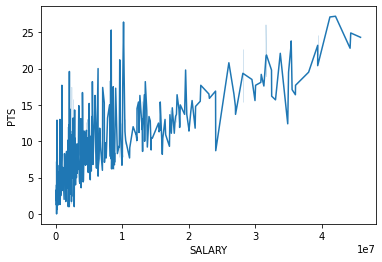

In [153]:
sns.lineplot(x="SALARY", 
             y="PTS",
             
             data=working_df)
# hue="POSITION", if we want tocompare the positions in the same graph


<AxesSubplot:xlabel='SALARY', ylabel='PTS'>

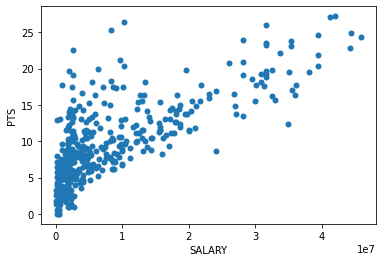

In [154]:
sns.scatterplot(x="SALARY", 
                y="PTS",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), 
                linewidth=0,
                data=working_df)

Now plot assists-vs-salary and rebounding-vs-salary

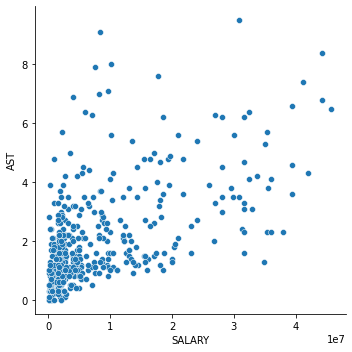

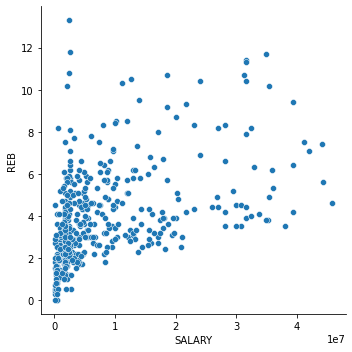

In [155]:
### Complete in this cell: plot assist-vs-salary, rebounding-vs-salary

sns.relplot(y="AST", 
            x="SALARY",
            sizes=(20,200),
            data=working_df)

sns.relplot(y="REB", 
            x="SALARY",
            sizes=(20,200),
            data=working_df)


When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

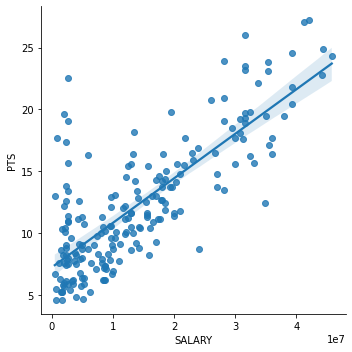

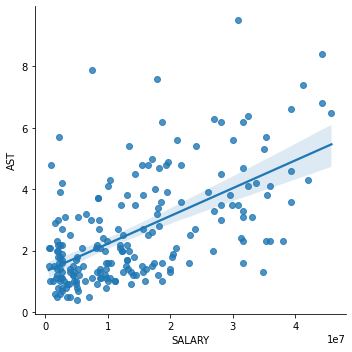

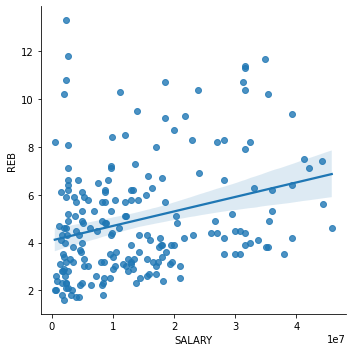

In [157]:
# plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience
# SEASON_EXP>4

df = working_df[['SEASON_EXP','PTS' ,'AST', 'REB', 'SALARY']] 

df_mask = df['SEASON_EXP'] > 4

filtered_df = df[df_mask]

g1 = sns.lmplot(
    data = filtered_df,
    x="SALARY", y="PTS",
    height=5
)

g2 = sns.lmplot(
    data = filtered_df,
    x="SALARY", y="AST",
    height=5
)

g3 = sns.lmplot(
    data = filtered_df,
    x="SALARY", y="REB",
    height=5
)

Now the scoring average grouped by position, we want to be able to see median, quartiles, etc 

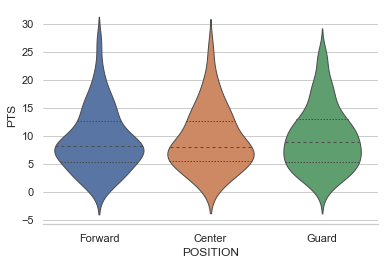

In [158]:
sns.set_theme(style="whitegrid")

sns.violinplot(
    data = working_df, 
    x = 'POSITION',
    y="PTS",
    split=True, inner="quart", linewidth=1)
sns.despine(left=True)

Height distribution of all players

<AxesSubplot:xlabel='HEIGHT', ylabel='Count'>

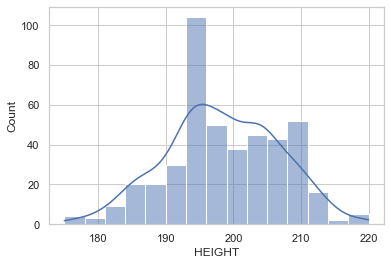

In [159]:
sns.histplot(data = working_df, 
             x="HEIGHT", 
             kde=True)